<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Phillip/Final_Notebook_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TechLabs final project 
## (Problem 2 - Group 8)

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Alejandro Echavarria, Juliana Bedoya, Laura Laks, Luca Wulfert, Marco Stoever and Phillip Guske

---

# Data Preparation

### libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
countries_csv_url = 'https://raw.githubusercontent.com/rechavar/pyCovid_TechLabsProj/master/countries.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [0]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)
df_countries = pd.read_csv(countries_csv_url)

In [0]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84


In [0]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4


In [0]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,771,777,783,789,795,803,812,823,851,857
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,652,653,653,663,676,676,681,684,692
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,18,18,18,18,18,18,18,18


In [0]:
pd.set_option('display.max_rows', 300)

print(df_confirmed.iloc[:,1:2])
print(df_death.iloc[:,1:2])
print(df_recovered.iloc[:,1:2])

#Taiwan is written with an asterisk (*) at the end, we have to change this:
#We also want to have "USA" instead of "US":
#Congo (Brazzaville) and Congo (Kinshasa) are capitals of different countries!
#Brazzaville -> Republic of the Congo || Kinshasa -> Democratic Republic of the Congo

#We will change this in the data cleaning part

                       Country/Region
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                           Australia
10                          Australia
11                          Australia
12                          Australia
13                          Australia
14                          Australia
15                          Australia
16                            Austria
17                         Azerbaijan
18                            Bahamas
19                            Bahrain
20                         Bangladesh
21                           Barbados
22                            Belarus
23                            Belgium
24                              Benin
25          

In [0]:
#reset max_rows displayed to default number (10):
pd.set_option('display.max_rows', 10)

In [0]:
all_dataframes = {'confirmed': df_confirmed,
                  'death': df_death,
                  'recovered': df_recovered,
                  'countries': df_countries}

### Data Cleaning

In [0]:
for key, df in all_dataframes.items():
  print('cleaning: {}'.format(key))

  if key == 'countries':
    continue

  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)

  #Grouping together countries originally split into multiple Provinces/States
  #(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
  df = df.groupby(by = df.index, axis = 0).sum()

  # Addition of a "global" row
  df.loc['Global'] = df.sum(axis=0)

  #transpose
  df=df.T
  df.rename_axis(index='Date', columns="Country",inplace=True)
  df.index = pd.to_datetime(df.index)

  #Naming the Date index:
  df.index.rename("Date", inplace= True)

  #Creating a datetime index:
  df.index = pd.to_datetime(df.index)
  
  #Save new dataFrame
  all_dataframes[key] = df

# Change country names in df_countries
old_names = [ 'Myanmar [Burma]', 'Cape Verde',  "C?te d'Ivoire", 'Czech Republic',
             'Congo [DRC]',  'Swaziland', 'Vatican City',  'South Korea', 'Macedonia [FYROM]',
              'Congo [Republic]',  'S?o Tom? and Pr?ncipe',  'United States',  'Gaza Strip','Sudan']

new_names = ['Burma', 'Cabo Verde', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of the Congo',
              'Eswatini',  'Holy See',  'Korea, South',  'North Macedonia',  'Republic of the Congo',
             'Sao Tome and Principe', 'USA',  'West Bank and Gaza','South Sudan']

all_dataframes['countries'] = all_dataframes['countries'].replace(old_names, new_names)

cleaning: confirmed
cleaning: death
cleaning: recovered
cleaning: countries


In [0]:
all_dataframes['confirmed']
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26,11831,1029,8697,763,70,25,13228,7402,7139,16557,...,789,3290,1211,327,429,9,249,920,56,5589626
2020-05-27,12456,1050,8857,763,71,25,13933,7774,7150,16591,...,803,3369,1245,327,434,9,256,1057,132,5691790
2020-05-28,13036,1076,8997,763,74,25,14702,8216,7165,16628,...,811,3444,1325,327,446,9,278,1057,149,5808946


### New Dataframe: Active Cases

In [0]:
all_dataframes['active'] = all_dataframes['confirmed'] - all_dataframes['recovered'] - all_dataframes['death']

### Calculating Projections

In [0]:
def create_country(country):
  country_confirmed=all_dataframes["confirmed"].loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in all_dataframes["confirmed"].columns}

In [0]:
from datetime import timedelta

def create_projection(country):
  
  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=21, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]
  
    
  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']
         
  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
    
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
        
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in all_dataframes["confirmed"].columns}

In [0]:
def add_more_projections(country):
  projection_dataframes[country]['Death Cases']=all_dataframes['death'][country]
  projection_dataframes[country]['Recovered Cases']=all_dataframes['recovered'][country]
  projection_dataframes[country]['Active Cases']=(projection_dataframes[country]['Total Cases']
                                                    -projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Recovered Cases'])
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))

  Recovered_Rate=projection_dataframes[country]['Recovered Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()
  Death_Rate=projection_dataframes[country]['Death Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()

  for date in projection_dataframes[country].index:
      if projection_dataframes[country].loc[date, 'Prediction']:
        projection_dataframes[country].loc[date, 'Recovered Cases']=(Recovered_Rate*projection_dataframes[country].shift(1).loc[date, 'Active Cases']
                                                                       +projection_dataframes[country].shift(1).loc[date, 'Recovered Cases'])
        projection_dataframes[country].loc[date, 'Death Cases']=(Death_Rate*projection_dataframes[country].shift(21).loc[date, 'New Cases']
                                                                   +projection_dataframes[country].shift(1).loc[date, 'Death Cases'])
        projection_dataframes[country].loc[date, 'Active Cases']=(projection_dataframes[country].loc[date, 'Total Cases']
                                                                    -projection_dataframes[country].loc[date, 'Recovered Cases']
                                                                    -projection_dataframes[country].loc[date, 'Death Cases'])
      
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))  
                                                                 
for country in all_dataframes["confirmed"].columns:
  add_more_projections(country)

### Machine Learning Approach

In [0]:
#%pip install fbprophet

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [0]:
countrywise = pd.DataFrame()
countrywise['Country'] = all_dataframes['confirmed'].columns
countrywise = countrywise.set_index('Country')
countrywise['Confirmed'] = all_dataframes['confirmed'].iloc[-1,:]
countrywise['Death'] = all_dataframes['death'].iloc[-1,:]
countrywise['Recovered'] = all_dataframes['recovered'].iloc[-1,:]
countrywise['Active'] = all_dataframes['active'].iloc[-1,:]
countrywise.head()

,Confirmed,Death,Recovered,Active
Country,,,,
Afghanistan,14525,249,1303,12973
Albania,1122,33,857,232
Algeria,9267,646,5549,3072
Andorra,764,51,692,21
Angola,84,4,18,62


In [0]:
countrywise['Mortality'] = (countrywise['Death']/countrywise['Confirmed'])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise['Survival porbability'] = 100 - countrywise['Mortality']

In [0]:
datewise = pd.DataFrame()
datewise['Date'] = all_dataframes['active'].index
datewise['Recovered'] = all_dataframes['recovered']['Global'].values
datewise['Confirmed'] = all_dataframes['confirmed']['Global'].values
datewise['Death'] = all_dataframes['death']['Global'].values
datewise['Active'] = all_dataframes['active']['Global'].values
datewise['Closed'] = datewise['Recovered'] + datewise['Death']
datewise = datewise.set_index('Date')

In [0]:
datewise['Mortality'] = datewise['Death']/datewise['Confirmed']*100
datewise['Recovery'] = datewise['Recovered']/datewise['Confirmed']*100
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery
Date,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045
2020-01-23,30,654,18,606,48,2.752294,4.587156
2020-01-24,36,941,26,879,62,2.763018,3.825717
2020-01-25,39,1434,42,1353,81,2.928870,2.719665
2020-01-26,52,2118,56,2010,108,2.644004,2.455146
...,...,...,...,...,...,...,...
2020-05-26,2286956,5589626,350452,2952218,2637408,6.269686,40.914294
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085
2020-05-28,2415960,5808946,360308,3032678,2776268,6.202640,41.590333


In [0]:
datewise['Days since'] = datewise.index-datewise.index[0]
datewise['Days since'] = datewise["Days since"].dt.days
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery,Days since
Date,,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045,0
2020-01-23,30,654,18,606,48,2.752294,4.587156,1
2020-01-24,36,941,26,879,62,2.763018,3.825717,2
2020-01-25,39,1434,42,1353,81,2.928870,2.719665,3
2020-01-26,52,2118,56,2010,108,2.644004,2.455146,4
...,...,...,...,...,...,...,...,...
2020-05-26,2286956,5589626,350452,2952218,2637408,6.269686,40.914294,125
2020-05-27,2350088,5691790,355628,2986074,2705716,6.248087,41.289085,126
2020-05-28,2415960,5808946,360308,3032678,2776268,6.202640,41.590333,127


#### Predictions using ML models

In [0]:
train = datewise.iloc[:int(datewise.shape[0] * 0.90)]
val = datewise.iloc[int(datewise.shape[0] * 0.90):]
models = {}

In [0]:
def plot_model(X, y, y_hat, title):

  plt.figure(figsize=(8,4))
  plt.plot(X, y, color = 'b', label = 'Confirmed cases')
  plt.plot(X, y_hat, color = 'r', label = 'Confirmed predicted cases')
  plt.legend(loc = 'best')
  plt.grid()
  plt.title(title)
  plt.show()

Polynomial regression

In [0]:
poly = PolynomialFeatures(degree = 10)
xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))
polyRegression = LinearRegression(normalize=True)
polyRegression.fit(xtrain_poly, train['Confirmed'])
predictions = polyRegression.predict(xvalid_poly)
rmse_poly = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error: ', rmse_poly)
x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
y_hat_poly = polyRegression.predict(x_poly)

Error:  260303.41032079305


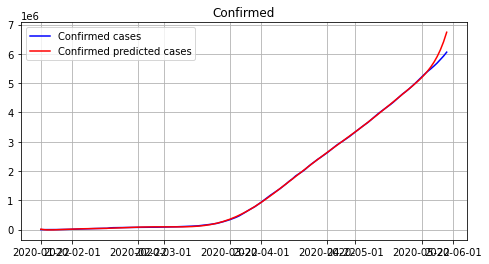

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_poly,'Confirmed')

Support vector machine

Error:  847374.6101863071


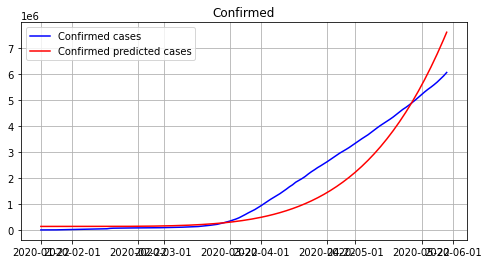

In [0]:
svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_svm = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_svm)
y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_svm,'Confirmed')

Ensemble method : Ada Boost 

Error:  895281.5029518193


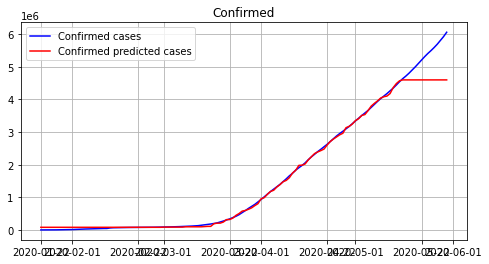

In [0]:
adam = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
adam.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = adam.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_adam = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_adam)
y_hat_adam = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_adam, 'Confirmed')

Facebook's prophet

In [0]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [0]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [0]:
forecast_c

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
142,2020-06-12
143,2020-06-13
144,2020-06-14
145,2020-06-15


In [0]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [0]:
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -1.215518e+04 -4.377608e+04  1.998447e+04
1   2020-01-23 -5.441238e+03 -3.746967e+04  2.614687e+04
2   2020-01-24  2.469201e+03 -2.851534e+04  3.509771e+04
3   2020-01-25  7.434877e+03 -2.496291e+04  3.747836e+04
4   2020-01-26  3.070153e+03 -2.992274e+04  3.494926e+04
..         ...           ...           ...           ...
142 2020-06-12  7.172890e+06  7.012817e+06  7.347232e+06
143 2020-06-13  7.268325e+06  7.091282e+06  7.447360e+06
144 2020-06-14  7.354430e+06  7.159285e+06  7.561550e+06
145 2020-06-15  7.443351e+06  7.224609e+06  7.664556e+06
146 2020-06-16  7.533784e+06  7.301720e+06  7.785514e+06

[147 rows x 4 columns]


Figure(720x432)


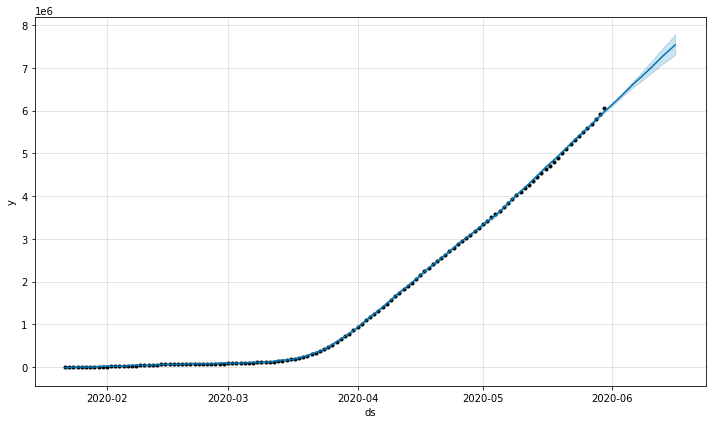

In [0]:
print(prophet_c.plot(confirmed_forecast))

In [0]:
prophet_rmse = np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))

In [0]:
print('Error: ', prophet_rmse)

Error:  15711.133274735053


We chose 4 models to apply to each country and each case type.  <br> Those models are: Facebook's prophet, Polynomial regression, Ada boost and Support vector machine

In [0]:
def apply_fb_prophet(database, case, plot = True):
  prophet=Prophet(interval_width=0.95,weekly_seasonality=True)
  prophet_=pd.DataFrame(zip(list(database.index),list(database[case])),columns=['ds','y'])

  prophet.fit(prophet_)

  forecast=prophet.make_future_dataframe(periods=17)
  forecast_confirmed=forecast.copy()
  confirmed_forecast=prophet.predict(forecast)
  if plot:
    print(prophet.plot(confirmed_forecast))

  return prophet                 

In [0]:
def apply_poly(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  poly = PolynomialFeatures(degree = 10) 

  xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
  xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))

  polyRegression = LinearRegression(normalize=True)
  polyRegression.fit(xtrain_poly, train[case])

  predictions = polyRegression.predict(xvalid_poly)
  rmse_poly = np.sqrt(mean_squared_error(val[case],predictions))
  print('Error: ', rmse_poly)

  x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
  y_hat_poly = polyRegression.predict(x_poly) 
  if plot:
    plot_model(database.index, database[case], y_hat_poly, case)

  return polyRegression, poly 

In [0]:
def apply_svm(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
  svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  
  predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_svm = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_svm)

  y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_svm, case)
  return svm

In [0]:
def apply_ada(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]  

  ada = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
  ada.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  predictions = ada.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_adam = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_adam)
  y_hat_adam = ada.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_adam, case)
  return ada

Applying each model to death and recovered cases

FACEBOOK PROPHET

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


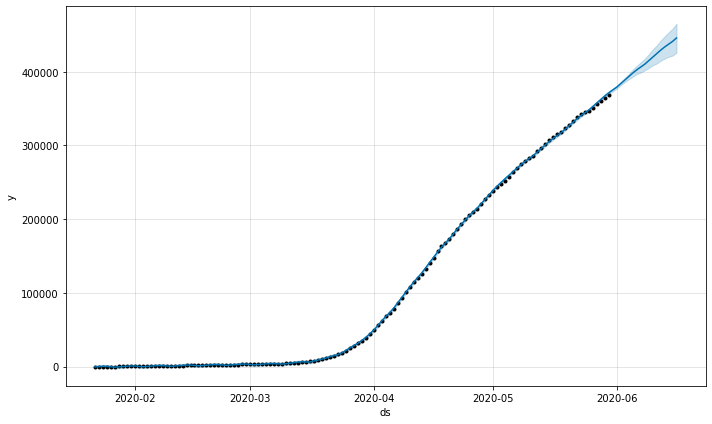

In [0]:
fb_death = apply_fb_prophet(datewise, 'Death')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


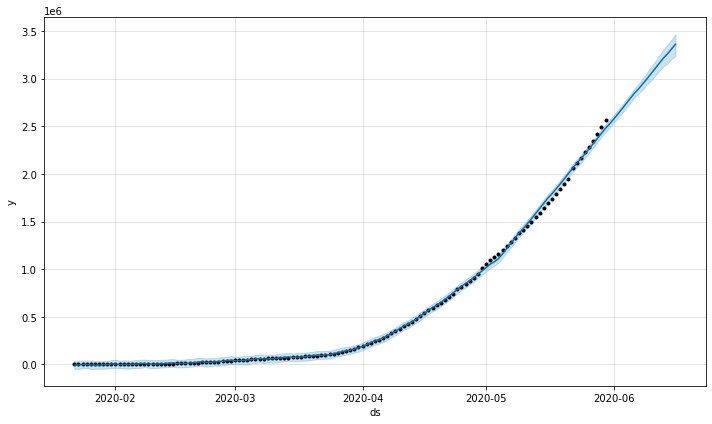

In [0]:
fb_recovered = apply_fb_prophet(datewise, 'Recovered')

POLYNOMIAL REGRESSOR

Error:  2606.5310102456583


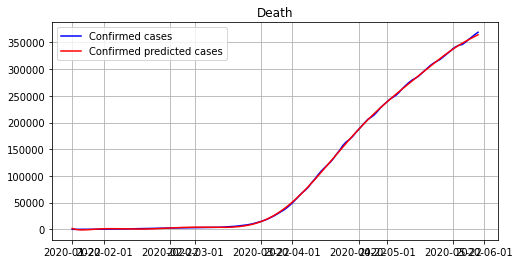

In [0]:
poly_death = apply_poly(datewise, 'Death')

Error:  282015.2076768943


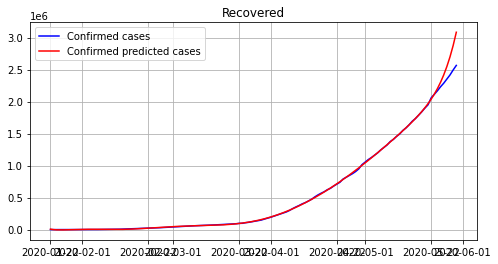

In [0]:
poly_recovered = apply_poly(datewise, 'Recovered')

SVM

Error:  197278.7164830078


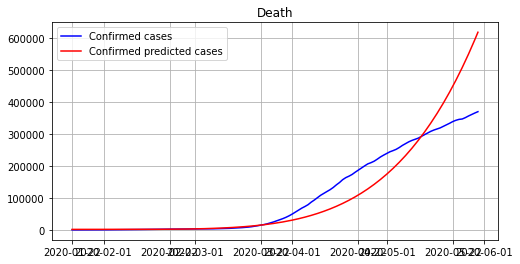

In [0]:
svm_death = apply_svm(datewise, 'Death')

Error:  228168.10299140585


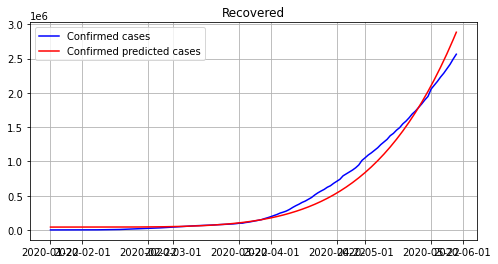

In [0]:
svm_recovered = apply_svm(datewise,'Recovered')

Ada boost

Error:  22143.33378058435


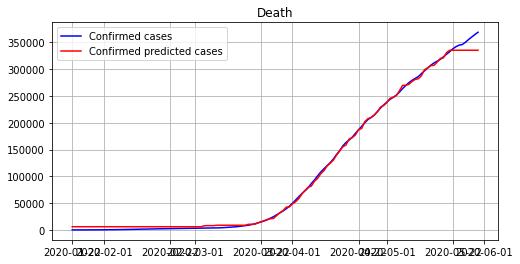

In [0]:
ada_death = apply_ada(datewise,'Death')

Error:  331236.3182093593


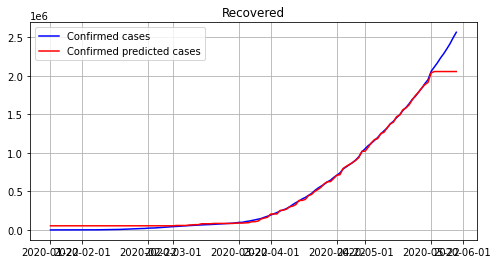

In [0]:
ada_recovered = apply_ada(datewise,'Recovered')

In [0]:
def make_datewise(country):
  datewise = pd.DataFrame()
  datewise['Date'] = all_dataframes['active'].index
  datewise['Recovered'] = all_dataframes['recovered'][country].values
  datewise['Confirmed'] = all_dataframes['confirmed'][country].values
  datewise['Death'] = all_dataframes['death'][country].values
  datewise['Active'] = all_dataframes['active'][country].values
  datewise['Closed'] = datewise['Recovered'] + datewise['Death']
  datewise = datewise.set_index('Date')
  datewise['Days since'] = datewise.index-datewise.index[0]
  datewise['Days since'] = datewise["Days since"].dt.days
  return datewise

In [0]:
all_datewise = {}
for country in countrywise.index:
  print('country: ', country)
  all_datewise[country] = make_datewise(country)

country:  Afghanistan
country:  Albania
country:  Algeria
country:  Andorra
country:  Angola
country:  Antigua and Barbuda
country:  Argentina
country:  Armenia
country:  Australia
country:  Austria
country:  Azerbaijan
country:  Bahamas
country:  Bahrain
country:  Bangladesh
country:  Barbados
country:  Belarus
country:  Belgium
country:  Belize
country:  Benin
country:  Bhutan
country:  Bolivia
country:  Bosnia and Herzegovina
country:  Botswana
country:  Brazil
country:  Brunei
country:  Bulgaria
country:  Burkina Faso
country:  Burma
country:  Burundi
country:  Cabo Verde
country:  Cambodia
country:  Cameroon
country:  Canada
country:  Central African Republic
country:  Chad
country:  Chile
country:  China
country:  Colombia
country:  Comoros
country:  Costa Rica
country:  Cote d'Ivoire
country:  Croatia
country:  Cuba
country:  Cyprus
country:  Czechia
country:  Democratic Republic of the Congo
country:  Denmark
country:  Diamond Princess
country:  Djibouti
country:  Dominica
coun

In [0]:
all_datewise

{'Afghanistan':             Recovered  Confirmed  Death  Active  Closed  Days since
 Date                                                               
 2020-01-22          0          0      0       0       0           0
 2020-01-23          0          0      0       0       0           1
 2020-01-24          0          0      0       0       0           2
 2020-01-25          0          0      0       0       0           3
 2020-01-26          0          0      0       0       0           4
 ...               ...        ...    ...     ...     ...         ...
 2020-05-26       1128      11831    220   10483    1348         125
 2020-05-27       1138      12456    227   11091    1365         126
 2020-05-28       1209      13036    235   11592    1444         127
 2020-05-29       1259      13659    246   12154    1505         128
 2020-05-30       1303      14525    249   12973    1552         129
 
 [130 rows x 6 columns],
 'Albania':             Recovered  Confirmed  Death  Active  

In [0]:
def get_prediction(country: str, case: str, model : str, dataframe_dict, days = 21):
    print('Calculating {} cases for {} using the model {}'.format(case, country, model))
    df = dataframe_dict[country]
    if model == 'poly':
        modelo, featuresTransform = apply_poly(df,case, plot = False)
    if model == 'svm':
        modelo = apply_svm(df,case, plot = False)
    if model == 'facebook':
        modelo = apply_fb_prophet(df,case, plot = False)
    if model == 'ada':
        modelo = apply_ada(df,case, plot = False)

    if model == 'facebook':
      forecast=modelo.make_future_dataframe(periods = days)
      forecast_confirmed=forecast.copy()
      y_hat = modelo.predict(forecast)

    elif model == 'poly':
      x_hat_list = range(df['Days since'].max() ,df['Days since'].max() + days)
      x_hat = featuresTransform.fit_transform(np.asarray(x_hat_list).reshape(-1,1))
      y_hat = modelo.predict(x_hat)
      
    else:
      x_hat_list = range(df['Days since'].max() ,df['Days since'].max() + days)    
      x_hat = np.asarray(x_hat_list).reshape(-1,1)
      print(x_hat)
      y_hat = modelo.predict(x_hat)


    return y_hat

In [0]:
prediction = get_prediction('Germany', 'Confirmed', 'poly', all_datewise)
prediction

Calculating Confirmed cases for Germany using the model poly
Error:  74876.83885362238


array([  326963.84519796,   381878.41227368,   451973.57706288,
         540423.33772306,   650903.13660077,   787649.7542098 ,
         955526.55071477,  1160094.40307836,  1407688.70177106,
        1705502.78697042,  2061678.22082166,  2485402.30960111,
        2987013.30667905,  3578113.74570111,  4271692.37138013,
        5082255.15462522,  6025965.89780454,  7120796.95606259,
        8386690.62099485,  9845731.73368863, 11522332.11583356])

# Interactive Data Visualization <br> (Chapters 1 and 2)

## Chapter 1: World Map


In [0]:
#rename df_countries columns for merge
all_dataframes['countries'].rename(columns= {'country': 'shortcut', 'name': 'Country'}, inplace = True)
all_dataframes['countries'].head()

,shortcut,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
#setting up the world map in bokeh
import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d, Span, Label
from bokeh.layouts import layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, VBox, HBox

import warnings
warnings.filterwarnings('ignore')

output_notebook()
from bokeh.tile_providers import get_provider, Vendors

# create slider
dates = list(pd.date_range(all_dataframes["confirmed"].index.min(), all_dataframes["confirmed"].index.max(), freq='D'))
options = [(i.strftime('%Y-%m-%d'), i) for i in dates]
index = len(dates)-1
date_slider = widgets.SelectionSlider(
    options = options,
    index = index,
    description = 'Choose the Date:',
    orientation = 'horizontal',
    layout={'width': '900px'}, 
    style = {'description_width': 'initial'}
)
   

#Dropdown Widget:
#drop_down_worldmap = widgets.Dropdown(options=[all_dataframes['map']["Active"], all_dataframes['map']["Death"],
#                                              all_dataframes['map']["Confirmed"], all_dataframes['map']["Recovered"],
#                                               value="Active",
#                                               description='Case type:',
#                                               disabled=False)

def show_world_map(date_shown, Casetype = ["Active", "Death", "Confirmed", "Recovered"]):

    all_dataframes['map'] = pd.DataFrame()
    all_dataframes['map']['Active'] = all_dataframes['active'].loc[date_shown,:]
    all_dataframes['map']['Death'] = all_dataframes['death'].loc[date_shown,:]
    all_dataframes['map']['Confirmed'] = all_dataframes['confirmed'].loc[date_shown,:]
    all_dataframes['map']['Recovered'] = all_dataframes['recovered'].loc[date_shown,:]
    all_dataframes['map'] = pd.merge(all_dataframes['map'],all_dataframes['countries'],on='Country')

    #Circles sizes for each country:
    all_dataframes['map']['sizeOfCircles'] = all_dataframes['map'][Casetype]/all_dataframes['map'][Casetype].max()*200
    all_dataframes['map'].loc[all_dataframes['map']['sizeOfCircles'] < 6, 'sizeOfCircles'] = 6

    #get the coordinates from https://carto.com/
    tile_provider = get_provider(Vendors.CARTODBPOSITRON)

    p = figure(plot_width=900, plot_height=425, title="Interactive Covid-19 World Map",
               x_range=(-2000000, 6000000),
               y_range=(-1000000, 7000000),
               x_axis_type="mercator",
               y_axis_type="mercator",
               x_axis_label='Longitude',
               y_axis_label='Latitude')
    p.title.text_font_size = "35px"
    p.title.align = "center"
    p.add_tile(tile_provider)

    #Transform LON/LAT coordinates in web mercator format'
    #function to transform
    def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):

          k = 6378137
          df["x"] = df[lon] * (k * np.pi/180.0)
          df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

          return df

    #rename columns for the function
    all_dataframes['map'].rename(columns={"longitude": "LON", "latitude": "LAT"}, inplace=True)

    #use the function 
    wgs84_to_web_mercator(all_dataframes['map'])

    #make it interactive

    all_dataframes['map'].drop(columns=['LAT', 'LON'])

    #convert the dataframe into a ColumnDataSource so that bokeh can work with it
    psource = ColumnDataSource(all_dataframes['map'])
    
    if Casetype == "Active":
        linecolor = "blue"
        fillcolor = "blue"
        
    if Casetype == "Confirmed":
        linecolor = "black" 
        fillcolor = "black"
        
    if Casetype == "Recovered":
        linecolor = "green"   
        fillcolor = "green"

    if Casetype == "Death":
        linecolor = "red" 
        fillcolor = "red"
        
    p.circle('x', 'y', source=psource, size='sizeOfCircles',
             line_color=linecolor, 
             fill_color=fillcolor,
             fill_alpha=0.05,
             legend_label="Relative Amount of Cases on that Day ")

    #create hover tool
    my_hover = HoverTool()
    
    if Casetype == "Active":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Active Cases', '@Active{0,0}')]
    if Casetype == "Confirmed":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Confirmed Cases', '@Confirmed{0,0}')]
    if Casetype == "Recovered":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Recovered Cases', '@Recovered{0,0}')]
    if Casetype == "Death":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Death Cases', '@Death{0,0}')]
    p.add_tools(my_hover)


    show(p)
    
interact_manual(show_world_map, date_shown = date_slider);

Loading BokehJS ...

interactive(children=(SelectionSlider(description='Choose the Date:', index=129, layout=Layout(width='900px'),…

## Chapter 2: Interactive Bokeh Plot

In [0]:
#%pip install bokeh

In [0]:
# line plot - multiple lines

import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d, Span, Label
from bokeh.layouts import layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, VBox, HBox

import warnings
warnings.filterwarnings('ignore')

output_notebook()
############################################################################
#Widgets:

#Dropdown Widget:
drop_down = widgets.Dropdown(options=all_dataframes['confirmed'].columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

checkbox_confirmed = widgets.Checkbox(
    value=True,
    description='Show Confirmed Cases',
    disabled=False,
    indent=False
)
checkbox_active = widgets.Checkbox(
    value=False,
    description='Show Active Cases',
    disabled=False,
    indent=False
)

checkbox_recovered = widgets.Checkbox(
    value=False,
    description='Show Recovered Cases',
    disabled=False,
    indent=False
)

checkbox_death = widgets.Checkbox(
    value=False,
    description='Show Death Cases',
    disabled=False,
    indent=False
)

checkbox_repr_projection = widgets.Checkbox(
    value=True,
    description='Show Reproduction Rate Projection',
    disabled=True,
    indent=False
)

checkbox_prophet = widgets.Checkbox(
    value=False,
    description='Show Facebook Prophet Projection',
    disabled=True,
    indent=False
)

checkbox_poly_regr = widgets.Checkbox(
    value=False,
    description='Show Polynomial Regression Projection',
    disabled=True,
    indent=False
)

checkbox_svm = widgets.Checkbox(
    value=False,
    description='Show Support Vector Machine Projection',
    disabled=True,
    indent=False
)

checkbox_ada_regr = widgets.Checkbox(
    value=False,
    description='Show AdaBoost Projection',
    disabled=True,
    indent=False, visibility='hidden'
)

startdatepicker = widgets.DatePicker(
    description='Pick a Startdate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = all_dataframes["confirmed"].index[0]
)

enddatepicker = widgets.DatePicker(
    description='Pick an Enddate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = projection_dataframes["Germany"].index[-1]
)

toggle_projections = widgets.ToggleButton(
    value=False,
    description='Show Projections',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Do you want to include projections in the plot?',
    icon='check' # (FontAwesome names without the `fa-` prefix) #check
)

############################################################################

############################################################################
#plotting function
def plot_country(country, startdate, enddate, 
                 confirmed, active, recovered, death,
                 #projection_confirmed = True
                 include_projection,
                 reproduction_projection, prophet_projection, poly_projection, svm_projection, adaboost_projection):

  #plot setup: 
  multi_line_plot = figure(plot_width=900, plot_height=425, title='Covid-19 Cases in {}'.format(country), 
                           x_axis_label='Date', y_axis_label='No. of Cases in {}'.format(country),
                           x_axis_type='datetime', y_axis_type = "linear")
  multi_line_plot.title.text_font_size = "35px"
  multi_line_plot.title.align = "center"

  multi_line_plot.left[0].formatter.use_scientific = False
    
  #data lines:
  if confirmed == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['confirmed'],
                       color='black', line_width=2, line_dash = "dashed", legend = "Confirmed Cases")
  if active == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['active'],
                       color='blue', line_width=2, legend = "Active Cases")
  if recovered == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['recovered'],
                       color='green', line_width=2, legend = "Recovered Cases")
  if death == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['death'],
                       color='red', line_width=2, legend = "Death Cases")
        
  #projection lines:
  if include_projection == True:
    checkbox_repr_projection.disabled = False
    checkbox_prophet.disabled = False
    checkbox_poly_regr.disabled = False
    checkbox_svm.disabled = False
    checkbox_ada_regr.disabled = False
    
    if confirmed == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Total Cases"], 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
    if active == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Active Cases"], 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
    if recovered == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Recovered Cases"], 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
    if death == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Death Cases"], 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
            
  #disable projection checkboxes when include_projection is unchecked:          
  if include_projection == False:
    checkbox_repr_projection.disabled = True
    checkbox_prophet.disabled = True
    checkbox_poly_regr.disabled = True
    checkbox_svm.disabled = True
    checkbox_ada_regr.disabled = True 
    
  multi_line_plot.x_range = Range1d(startdate, enddate)
  
  #add vertical line  
  projection_beginning = all_dataframes['confirmed'].index.max()
  beginning_of_projection = Span(location=projection_beginning,
                            dimension='height', line_color='orange',
                            line_dash='dashed', line_width=1, 
                            name = "Beginning of Projection") 
  multi_line_plot.add_layout(beginning_of_projection)

    
  # add hover tool
  hover = HoverTool()
  hover.tooltips = [('Date','@Date{%F}'),('No. of Cases','@{}'.format(country))]
  hover.formatters = {'Date': 'datetime'} 
  multi_line_plot.add_tools(hover)

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"
  multi_line_plot.legend.background_fill_alpha = 0.35

  show(multi_line_plot)
############################################################################

############################################################################
#Interact function:
interact(plot_country, country = drop_down, startdate = startdatepicker, enddate = enddatepicker,
         confirmed = checkbox_confirmed, active = checkbox_active, 
         recovered = checkbox_recovered, death = checkbox_death,
         include_projection = toggle_projections,
         reproduction_projection = checkbox_repr_projection, prophet_projection = checkbox_prophet,
         poly_projection = checkbox_poly_regr, svm_projection = checkbox_svm, 
         adaboost_projection = checkbox_ada_regr);
############################################################################

#The Hover Tool does not work yet for the predictions
#We don't have prediction numbers yet for the ML models, that's why they are not yet implemented

Loading BokehJS ...

interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

In [0]:
all_dataframes['confirmed']

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26,11831,1029,8697,763,70,25,13228,7402,7139,16557,...,789,3290,1211,327,429,9,249,920,56,5589626
2020-05-27,12456,1050,8857,763,71,25,13933,7774,7150,16591,...,803,3369,1245,327,434,9,256,1057,132,5691790
2020-05-28,13036,1076,8997,763,74,25,14702,8216,7165,16628,...,811,3444,1325,327,446,9,278,1057,149,5808946


# Chapter 3: Clustering

## Clusters based on the reproduction rate

In [0]:
country_dataframes['Afghanistan']

Afghanistan,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-01-22,0,NaN,NaN,False
2020-01-23,0,0.0,NaN,False
2020-01-24,0,0.0,NaN,False
2020-01-25,0,0.0,NaN,False
2020-01-26,0,0.0,NaN,False
...,...,...,...,...
2020-05-26,11831,658.0,1.320898,False
2020-05-27,12456,625.0,1.198832,False
2020-05-28,13036,580.0,1.112813,False


In [0]:
r_7 = []
for key in country_dataframes.keys():
  r_7.append(country_dataframes[key].iloc[-1,-1])

In [0]:
r_7

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [0]:
countrywise['R_7'] = r_7

In [0]:
x_7 = countrywise[['R_7','Mortality']][countrywise['Confirmed']>1000]
std = StandardScaler()
x_7 = std.fit_transform(x_7)

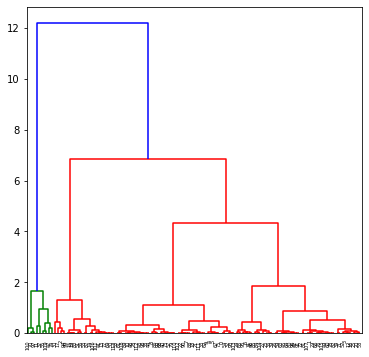

In [0]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendogram=sch.dendrogram(sch.linkage(x_7, method  = "ward"))

In [0]:
clusters = KMeans(n_clusters=2, random_state=6)
clusters.fit(x_7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [0]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'R_7']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['R_7 Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525,249,1303,12973,1.714286,8.970740,98.285714,False,0,0
Albania,1122,33,857,232,2.941176,76.381462,97.058824,False,0,0
Algeria,9267,646,5549,3072,6.970972,59.879141,93.029028,False,0,0
Andorra,764,51,692,21,6.675393,90.575916,93.324607,False,4,4
Angola,84,4,18,62,4.761905,21.428571,95.238095,False,4,4
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,False,4,4
Yemen,310,77,13,220,24.838710,4.193548,75.161290,False,4,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,False,0,0


In [0]:
clusters.predict(np.asarray(countrywise.loc['Nigeria'][['Mortality', 'R_7']]).reshape(1,-1))

array([0], dtype=int32)

In [0]:
summary = pd.concat([countrywise[countrywise['R_7 Clusters'] == 0].head(10),countrywise[countrywise['R_7 Clusters'] == 1].head(10),countrywise[countrywise['R_7 Clusters'] == 2].head(10),countrywise[countrywise['R_7 Clusters'] == 4].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525.00,249.00,1303.00,12973.00,1.71,8.97,98.29,0.00,0.00,0.00
Albania,1122.00,33.00,857.00,232.00,2.94,76.38,97.06,0.00,0.00,0.00
Algeria,9267.00,646.00,5549.00,3072.00,6.97,59.88,93.03,0.00,0.00,0.00
Argentina,16214.00,528.00,4788.00,10898.00,3.26,29.53,96.74,0.00,0.00,0.00
Armenia,8927.00,127.00,3317.00,5483.00,1.42,37.16,98.58,0.00,0.00,0.00
Australia,7192.00,103.00,6614.00,475.00,1.43,91.96,98.57,0.00,0.00,0.00
Austria,16685.00,668.00,15520.00,497.00,4.00,93.02,96.00,0.00,0.00,0.00
Azerbaijan,5246.00,61.00,3327.00,1858.00,1.16,63.42,98.84,0.00,0.00,0.00
Bahrain,10793.00,17.00,5826.00,4950.00,0.16,53.98,99.84,0.00,0.00,0.00


In [0]:
print('Average mortality of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['Mortality'].mean())
print('Average R_7 of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['R_7'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['Mortality'].mean())
print('Average R_7 of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['R_7'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['Mortality'].mean())
print('Average R_7 of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['R_7'].mean())

Average mortality of cluster 0: 3.7575053481653544
Average R_7 of cluster 0: 0.0
Average mortality of cluster 1: nan
Average R_7 of cluster 1: nan
Average mortality of cluster 2: nan
Average R_7 of cluster 2: nan


In [0]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['R_7 Clusters'] == 0].index)

Countries that belong to cluster 0:  Index([], dtype='object', name='Country')


In [0]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['R_7 Clusters'] == 1].index)

Countries that belong to cluster 1:  Index([], dtype='object', name='Country')


In [0]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['R_7 Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Tunisia', 'Turkey', 'USA', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uzbekistan', 'Venezuela', 'Zambia', 'Global'],
      dtype='object', name='Country', length=114)


## Clusters based on the mortality rate and the recovery rate

In [0]:
x_r = []
x_r = countrywise[['Mortality', 'Recovery']][countrywise['Confirmed']>1000]
std = StandardScaler() #K-means is a distance based algorithm
  
x_r = std.fit_transform(x_r)

Using dendogram to know the possible number of clusters

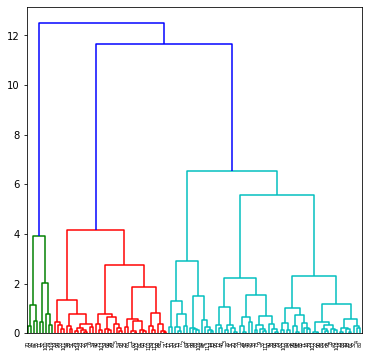

In [0]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendogram_r=sch.dendrogram(sch.linkage(x_r, method  = "ward"))

It seams like that we can work with 3 clusters

In [0]:
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x_r)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [0]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'Recovery']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525,249,1303,12973,1.714286,8.970740,98.285714,False,2,0
Albania,1122,33,857,232,2.941176,76.381462,97.058824,False,2,0
Algeria,9267,646,5549,3072,6.970972,59.879141,93.029028,False,2,0
Andorra,764,51,692,21,6.675393,90.575916,93.324607,False,4,4
Angola,84,4,18,62,4.761905,21.428571,95.238095,False,4,4
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,False,4,4
Yemen,310,77,13,220,24.838710,4.193548,75.161290,False,4,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,False,2,0


In [0]:
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525,249,1303,12973,1.714286,8.970740,98.285714,False,2,0
Albania,1122,33,857,232,2.941176,76.381462,97.058824,False,2,0
Algeria,9267,646,5549,3072,6.970972,59.879141,93.029028,False,2,0
Andorra,764,51,692,21,6.675393,90.575916,93.324607,False,4,4
Angola,84,4,18,62,4.761905,21.428571,95.238095,False,4,4
...,...,...,...,...,...,...,...,...,...,...
Western Sahara,9,1,6,2,11.111111,66.666667,88.888889,False,4,4
Yemen,310,77,13,220,24.838710,4.193548,75.161290,False,4,4
Zambia,1057,7,779,271,0.662252,73.699149,99.337748,False,2,0


In [0]:
summary = pd.concat([countrywise[countrywise['Clusters'] == 0].head(10),countrywise[countrywise['Clusters'] == 1].head(10),countrywise[countrywise['Clusters'] == 2].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525.00,249.00,1303.00,12973.00,1.71,8.97,98.29,0.00,2.00,0.00
Albania,1122.00,33.00,857.00,232.00,2.94,76.38,97.06,0.00,2.00,0.00
Algeria,9267.00,646.00,5549.00,3072.00,6.97,59.88,93.03,0.00,2.00,0.00
Argentina,16214.00,528.00,4788.00,10898.00,3.26,29.53,96.74,0.00,2.00,0.00
Armenia,8927.00,127.00,3317.00,5483.00,1.42,37.16,98.58,0.00,2.00,0.00
Australia,7192.00,103.00,6614.00,475.00,1.43,91.96,98.57,0.00,2.00,0.00
Austria,16685.00,668.00,15520.00,497.00,4.00,93.02,96.00,0.00,2.00,0.00
Azerbaijan,5246.00,61.00,3327.00,1858.00,1.16,63.42,98.84,0.00,2.00,0.00
Bahrain,10793.00,17.00,5826.00,4950.00,0.16,53.98,99.84,0.00,2.00,0.00


In [0]:
print('Average mortality of cluster 0:', countrywise[countrywise['Clusters']==0]['Mortality'].mean())
print('Average recovery of cluster 0:', countrywise[countrywise['Clusters']==0]['Recovery'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['Clusters']==1]['Mortality'].mean())
print('Average recovery of cluster 1:', countrywise[countrywise['Clusters']==1]['Recovery'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['Clusters']==2]['Mortality'].mean())
print('Average recovery of cluster 2:', countrywise[countrywise['Clusters']==2]['Recovery'].mean())

Average mortality of cluster 0: 3.4054542232847838
Average recovery of cluster 0: 55.358531168380246
Average mortality of cluster 1: 11.432219870561784
Average recovery of cluster 1: 8.519620708731392
Average mortality of cluster 2: nan
Average recovery of cluster 2: nan


In [0]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Thailand', 'Tunisia', 'Turkey', 'USA', 'Ukraine',
       'United Arab Emirates', 'Uzbekistan', 'Venezuela', 'Zambia', 'Global'],
      dtype='object', name='Country', length=109)


In [0]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['Clusters'] == 1].index)

Countries that belong to cluster 1:  Index(['Belgium', 'Haiti', 'Netherlands', 'Sweden', 'United Kingdom'], dtype='object', name='Country')


In [0]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['Clusters'] == 2].index)

Countries that belong to cluster 2:  Index([], dtype='object', name='Country')


Cluster 0: Countries that have a **High mortality** rate and **High recovery** rate 

---


Cluster 1: Countries that have **Low mortality** rate and **High recovery** rate

---


Cluster 2: Countries that have **Low mortality** rate and **Good recovery** rate